In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
page_data = pd.read_hdf("D:Netflixir/Dataset 2/pageview_data_26346481.h5",mode = 'r')
page_data['pageview_time'] = pd.to_datetime(page_data['pageview_time'])

In [33]:
page_data.shape

(76796, 11)

In [3]:
order_data = pd.read_hdf("D:Netflixir/Dataset 2/orders_data_26346481.h5",mode = 'r')
order_data['purchase_time'] = pd.to_datetime(order_data['purchase_time'])

In [35]:
order_data.shape

(8612, 7)

In [132]:
#number of USERID
len(page_data.USER_ID.unique())

8424

In [4]:
page_data.columns

Index(['EVENT_ID', 'REFERRER_URL', 'pageview_time', 'is_order_confirm',
       'USER_ID', 'CURRENT_URL', 'USER_AGENT', 'page_title', 'DEVICE_TYPE',
       'COUNTRY_CODE', 'REGION_CODE'],
      dtype='object')

In [5]:
order_data.columns

Index(['EVENT_ID', 'USER_ID', 'USER_AGENT', 'ORDER_ID', 'purchase_time',
       'order_value', 'items'],
      dtype='object')

In [6]:
EVO = list(order_data.EVENT_ID)
for i in list(page_data.EVENT_ID):
    if i in EVO:
        page_data.loc[page_data.EVENT_ID == i,['is_order_confirm']] = 1
    else:
        page_data.loc[page_data.EVENT_ID == i,['is_order_confirm']] = 0

In [19]:
page_data.is_order_confirm.unique()

array([0, 1], dtype=int64)

In [7]:
main_data = page_data.merge(order_data, on=['USER_ID', 'EVENT_ID'], how='left')

In [8]:
main_data = main_data.drop(['EVENT_ID', 'CURRENT_URL', 'USER_AGENT_x', 'page_title', 'REGION_CODE', \
                  'USER_AGENT_y', 'ORDER_ID','purchase_time'],axis= 1)

In [9]:
main_data = main_data.fillna(0)

In [10]:
main_data.shape

(76796, 8)

In [11]:
main_data['month'] = main_data.pageview_time.dt.month

In [12]:
main_data.columns

Index(['REFERRER_URL', 'pageview_time', 'is_order_confirm', 'USER_ID',
       'DEVICE_TYPE', 'COUNTRY_CODE', 'order_value', 'items', 'month'],
      dtype='object')

In [13]:
main_data

,REFERRER_URL,pageview_time,is_order_confirm,USER_ID,DEVICE_TYPE,COUNTRY_CODE,order_value,items,month
0,https://example.com/url/1,2021-12-01 00:09:22,0,16383165597449815,Smartphone,US,0.00,0.0,12
1,https://example.com/url/1,2021-12-01 00:09:32,0,16383165597449815,Smartphone,US,0.00,0.0,12
2,https://example.com/url/1,2021-12-01 00:09:38,0,16383165597449815,Smartphone,US,0.00,0.0,12
3,https://l.facebook.com/ref_url/0,2021-12-01 00:10:41,0,16383174375704533,Personal computer,US,0.00,0.0,12
4,0,2021-12-01 00:14:13,0,16383165597449815,Smartphone,US,0.00,0.0,12
...,...,...,...,...,...,...,...,...,...
76791,https://mail.google.com/ref_url/8,2022-11-30 23:32:49,0,16692455320116870,Smartphone,US,0.00,0.0,11
76792,https://example.com/url/4,2022-11-30 23:34:00,0,16698497992862424,Personal computer,US,0.00,0.0,11
76793,https://example.com/url/4,2022-11-30 23:34:07,0,16698497992862424,Personal computer,US,0.00,0.0,11
76794,https://example.com/url/10,2022-11-30 23:34:24,0,16698497992862424,Personal computer,US,0.00,0.0,11


In [25]:
main_data[main_data.USER_ID == 16492657383472455]

,REFERRER_URL,pageview_time,is_order_confirm,USER_ID,DEVICE_TYPE,COUNTRY_CODE,order_value,items,month
27808,https://example.com/url/4,2022-04-06 17:26:29,1,16492657383472455,Personal computer,US,87.05,1.0,4
27809,https://www.google.com/ref_url/2,2022-04-06 17:27:16,0,16492657383472455,Personal computer,US,0.00,0.0,4
27810,https://example.com/url/4,2022-04-06 17:30:09,1,16492657383472455,Personal computer,US,87.05,1.0,4
27811,https://www.google.com/ref_url/2,2022-04-06 17:30:38,0,16492657383472455,Personal computer,US,0.00,0.0,4
27812,https://example.com/url/4,2022-04-06 17:32:51,1,16492657383472455,Personal computer,US,85.25,1.0,4
27813,https://www.google.com/ref_url/2,2022-04-06 17:33:54,0,16492657383472455,Personal computer,US,0.00,0.0,4
27814,https://example.com/url/4,2022-04-06 17:36:22,1,16492657383472455,Personal computer,US,87.00,1.0,4
27815,https://www.google.com/ref_url/2,2022-04-06 17:37:04,0,16492657383472455,Personal computer,US,0.00,0.0,4
27816,https://example.com/url/4,2022-04-06 17:39:37,1,16492657383472455,Personal computer,US,86.65,1.0,4


In [26]:
page_data[page_data.USER_ID == 16492657383472455]

,EVENT_ID,REFERRER_URL,pageview_time,is_order_confirm,USER_ID,CURRENT_URL,USER_AGENT,page_title,DEVICE_TYPE,COUNTRY_CODE,REGION_CODE
13593,f035aaef90ba28594f07319bcdbf75f2,https://example.com/url/4,2022-04-06 17:26:29,1,16492657383472455,https://example.com/url/8564,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 4,Personal computer,US,NY
13594,9ef9c8cff30453629bbe8b80f475b8e1,https://www.google.com/ref_url/2,2022-04-06 17:27:16,0,16492657383472455,https://example.com/url/44,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 2,Personal computer,US,NY
13598,e7e9024d43c9d646f442658f68073315,https://example.com/url/4,2022-04-06 17:30:09,1,16492657383472455,https://example.com/url/8565,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 4,Personal computer,US,NY
13601,ba25b70a0c8f0c2312d9423147b02c4e,https://www.google.com/ref_url/2,2022-04-06 17:30:38,0,16492657383472455,https://example.com/url/44,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 2,Personal computer,US,NY
13607,e32d528eadd99239f15a2021aefd2f3c,https://example.com/url/4,2022-04-06 17:32:51,1,16492657383472455,https://example.com/url/8566,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 4,Personal computer,US,NY
13609,0d61a66af0a109286c81193a1da8e6dc,https://www.google.com/ref_url/2,2022-04-06 17:33:54,0,16492657383472455,https://example.com/url/44,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 2,Personal computer,US,NY
13615,13016abc5a3abc2c34babcb738036067,https://example.com/url/4,2022-04-06 17:36:22,1,16492657383472455,https://example.com/url/8567,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 4,Personal computer,US,NY
13624,34419ce0c8822bb8bb1a10979ed6f661,https://www.google.com/ref_url/2,2022-04-06 17:37:04,0,16492657383472455,https://example.com/url/44,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 2,Personal computer,US,NY
13628,81a51ce7030205ef564b30f8331a12c6,https://example.com/url/4,2022-04-06 17:39:37,1,16492657383472455,https://example.com/url/8568,Mozilla/5.0%20(Macintosh;%20Intel%20Mac%20OS%2...,Webpage Title 4,Personal computer,US,NY


In [109]:
main_data1 = main_data.groupby(['month', 'USER_ID']).\
agg({'REFERRER_URL': 'count', 
     'is_order_confirm': 'sum',
     'order_value': 'sum',
     'items': 'sum'
     #'DEVICE_TYPE':  (lambda x : np.unique(x)),
     #'COUNTRY_CODE': (lambda x : np.unique(x))
    }).reset_index()

In [110]:
#main_data1.DEVICE_TYPE.isnull().any()

In [111]:
main_data1

,month,USER_ID,REFERRER_URL,is_order_confirm,order_value,items
0,1,16412416254103,7,1,30.79,1.0
1,1,164062944356342,1,0,0.00,0.0
2,1,164204422164691,4,1,74.93,1.0
3,1,164305536682444,113,1,214.50,5.0
4,1,164321946158243,23,1,126.48,6.0
...,...,...,...,...,...,...
9242,12,16409822093989702,3,1,18.89,1.0
9243,12,16409825561394455,13,1,141.06,1.0
9244,12,16409830526265625,14,1,30.07,2.0
9245,12,16409839070762088,2,1,34.23,1.0


In [112]:
main_data1[main_data1.is_order_confirm == 5]

,month,USER_ID,REFERRER_URL,is_order_confirm,order_value,items
2308,4,16492657383472455,9,5,433.0,5.0


In [113]:
main_data2 = main_data1.pivot_table('month', ['USER_ID', 'is_order_confirm', 'order_value', 'items' ], 'month').reset_index()

In [114]:
main_data2.columns

Index([         'USER_ID', 'is_order_confirm',      'order_value',
                  'items',                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12],
      dtype='object', name='month')

In [115]:
main_data2.rename(columns = {'is_order_confirm':'NumberofOrder'}, inplace = True)

In [116]:
main_data2

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
0,16405032534493,1,46.64,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,16412416254103,1,30.79,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16465039202401,1,46.59,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16467124257545,1,125.44,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16492968433456,1,64.76,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,16698471240923541,1,100.87,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
9119,16698484353055459,1,35.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9120,16698486329865782,1,27.80,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
9121,16698497992862424,1,85.55,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


In [117]:
main_data2[main_data2.NumberofOrder == 5]

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
3717,16492657383472455,5,433.0,5.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
main_data2[main_data2.USER_ID == 16467124257545]

In [ ]:
main_data2.is_order_confirm.unique()

In [118]:
main_data2 = main_data2.fillna(0)

In [91]:
main_data2

month,USER_ID,No. of Order,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
0,16405032534493,1,46.64,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
1,16412416254103,1,30.79,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16465039202401,1,46.59,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16467124257545,1,125.44,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16492968433456,1,64.76,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,16698471240923541,1,100.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
9119,16698484353055459,1,35.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9120,16698486329865782,1,27.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
9121,16698497992862424,1,85.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [135]:
main_data2[main_data2.NumberofOrder==0]

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
17,164062944356342,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,164349018325261,0,0.0,0.0,5.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,164453262830481,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,165107094633810,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,165876016829076,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,16672315476544270,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7870,16672322130995900,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7873,16672351706316462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
7878,16672368934935990,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [138]:
main_data2[main_data2.USER_ID == 164453262830481]

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
27,164453262830481,0,0.00,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,164453262830481,1,59.89,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
main_data3 = main_data2.groupby(['USER_ID']).\
agg({'NumberofOrder' : 'sum',
     'order_value': 'sum',
     'items': 'sum',
     1: 'sum',
     2: 'sum',
     3: 'sum',
     4: 'sum',
     5: 'sum',
     6: 'sum',
     7: 'sum',
     8: 'sum',
     9: 'sum',
     10: 'sum',
     11: 'sum',
     12: 'sum'
    }).reset_index()

In [121]:
main_data3

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12
0,16405032534493,1,46.64,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
1,16412416254103,1,30.79,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16465039202401,1,46.59,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16467124257545,1,125.44,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16492968433456,1,64.76,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,16698471240923541,1,100.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
8420,16698484353055459,1,35.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8421,16698486329865782,1,27.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
8422,16698497992862424,1,85.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [162]:
main_data3.columns[4:16]

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object', name='month')

In [155]:
main_data3['surfing'] = main_data3.loc[:,range(1,13)].sum(axis=1)

In [156]:
main_data3[main_data3.USER_ID == 164453262830481]

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12,surfing
25,164453262830481,1,59.89,1.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [161]:
main_data3.surfing.max()

226.0

In [134]:
main_data3.NumberofOrder.value_counts()

1    8265
2     145
3      11
5       3
Name: NumberofOrder, dtype: int64

C:\Users\Anil.Kumar3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberofOrder', ylabel='count'>

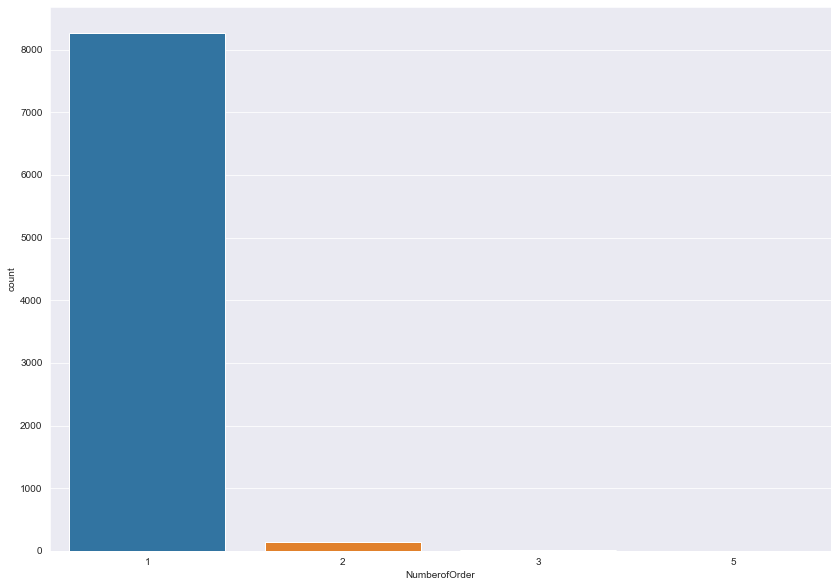

In [166]:
plt.figure(figsize=(14,10))
sns.countplot("NumberofOrder",data=main_data3)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=main_data3.NumberofOrder, y=main_data3.surfing)

<AxesSubplot:xlabel='surfing', ylabel='Density'>

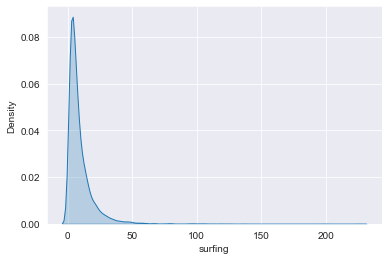

In [168]:
sns.kdeplot(data=main_data3['surfing'], shade=True)

<AxesSubplot:xlabel='surfing', ylabel='Density'>

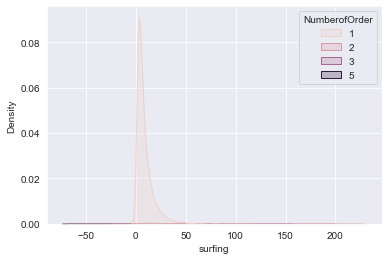

In [172]:
# KDE plots for each species
sns.kdeplot(data=main_data3, x='surfing', hue='NumberofOrder', shade=True)

In [182]:
main_data3[main_data3.NumberofOrder ==5].head(40)

month,USER_ID,NumberofOrder,order_value,items,1,2,3,4,5,6,7,8,9,10,11,12,surfing
347,1648995107575441,5,254.73,8.0,0.0,0.0,0.0,12.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
864,16334805022872695,5,191.87,5.0,0.0,1.0,7.0,0.0,4.0,1.0,6.0,16.0,7.0,9.0,20.0,4.0,75.0
3367,16492657383472455,5,433.00,5.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [178]:
import copy

In [179]:
main_data4 = main_data3.copy()

In [196]:
churn = []
for i in range(0,len(main_data4)):
   if main_data4.surfing[i] > 20:
        churn.append(0)
   else:
        churn.append(1)

In [193]:
main_data4.shape

(8424, 17)

In [197]:
main_data4['churn'] = churn

In [199]:
main_data4.churn.isnull().any()

False

In [202]:
y = main_data4['churn']
X = main_data4.drop(columns=['churn'])

In [207]:
from sklearn.model_selection import train_test_split

In [216]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   test_size=0.20, 
                                   shuffle=True)

In [214]:
def evaluate(X_train, X_test, y_train, y_test):
    model_name_list = ['Linear Regression',
                      'Random Forest', 'Extra Trees',
                       'Gradient Boosted','KNeighbors']

    
    model1 = LinearRegression()
    model3 = RandomForestClassifier(n_estimators=50)
    model4 = ExtraTreesClassifier(n_estimators=50)
    model6 = GradientBoostingClassifier(n_estimators=20)
    model7= KNeighborsClassifier(n_neighbors = 5)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model3, model4, model6,model7]):
   
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        r2 = r2_score(y_test,predictions)
        preds=np.where(predictions>0.5,1,0)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [r2]
    
    return results

In [217]:
results=evaluate(X_train, X_test, y_train, y_test)
results

C:\Users\Anil.Kumar3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anil.Kumar3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anil.Kumar3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anil.Kumar3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\U

,r2
Linear Regression,0.585396
Random Forest,1.0
Extra Trees,0.993655
Gradient Boosted,1.0
KNeighbors,-0.154701
